In [1]:
#!pip install pingouin
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt; plt.style.use('fivethirtyeight')
import warnings; warnings.filterwarnings("ignore")
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.cm as cm
import missingno as msno
import seaborn as sns
import pingouin as pg
import pandas as pd
import numpy as np

In [3]:
%%script false  #Skip Executing Cell
print("Hello")

Couldn't find program: 'false'


In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df = sns.load_dataset('titanic')
#df = sns.load_dataset('anscombe')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

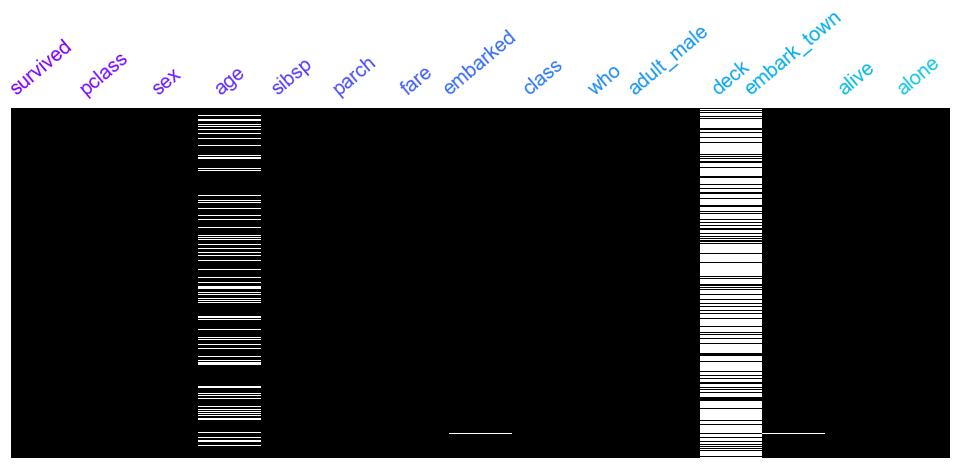

In [10]:
sns.set(font_scale=1, rc={'figure.figsize':(15,6)})
g = sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='binary_r')
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(fontsize = 20, rotation=40) 
colors = cm.rainbow(np.linspace(0, 1))
for i, ticklabel in enumerate(g.xaxis.get_majorticklabels()):
    ticklabel.set_color(colors[i])

<AxesSubplot:>

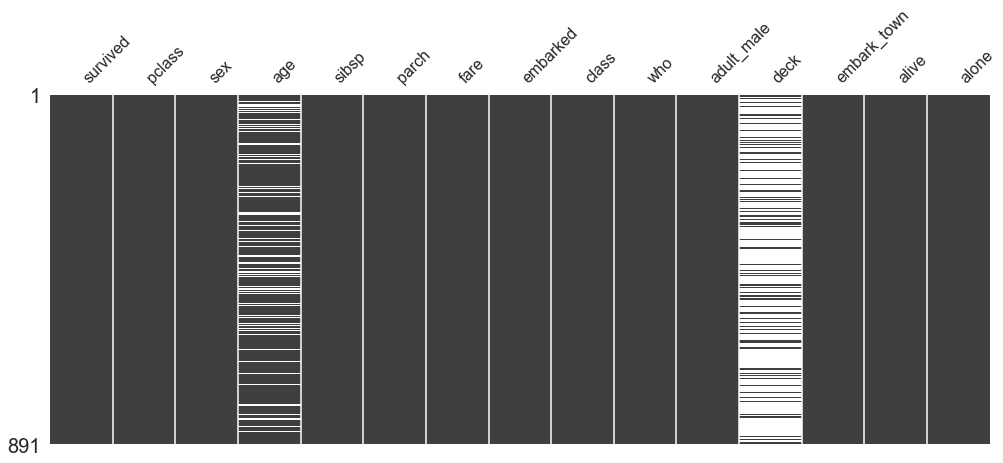

In [11]:
msno.matrix(df, figsize=(15,6), sparkline=False, p=0)

In [12]:
df.replace(np.nan,'0',inplace = True)

<AxesSubplot:>

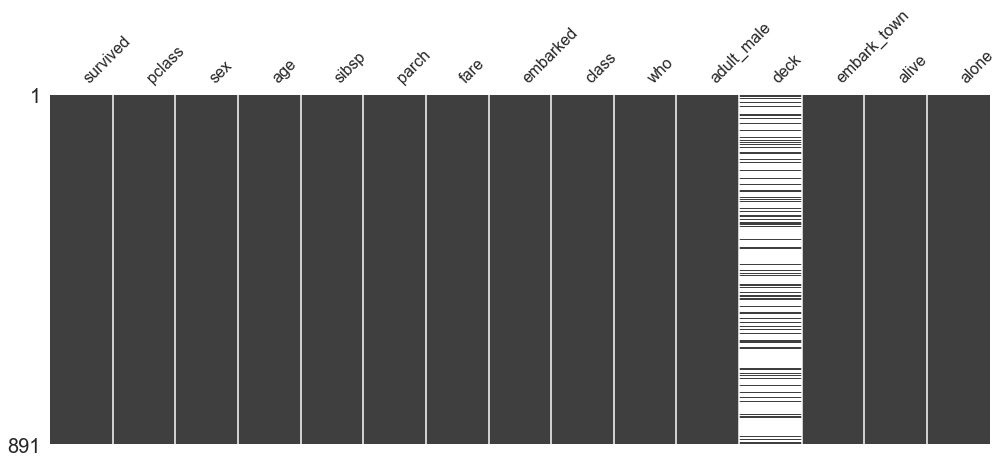

In [13]:
msno.matrix(df, figsize=(15,6), sparkline=False, p=0)

In [14]:
df.duplicated().sum()

107

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [16]:
df.dtypes

survived          int64
pclass            int64
sex              object
age              object
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [17]:
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers??

In [18]:
df0 = df.iloc[:, 0:5]
df0.columns.tolist()

['survived', 'pclass', 'sex', 'age', 'sibsp']

In [19]:
df.corr()

,survived,pclass,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,0.094035,0.135207
sibsp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [20]:
df = df.reset_index().drop('index', axis=1, errors='ignore')

In [21]:
df['deck'].unique()   # unique values

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
stats = df['deck'].describe().to_frame().T
stats

,count,unique,top,freq
deck,203,7,C,59


In [23]:
df.age.value_counts()

0       177
24.0     30
22.0     27
18.0     26
28.0     25
       ... 
36.5      1
55.5      1
0.92      1
23.5      1
74.0      1
Name: age, Length: 89, dtype: int64

In [25]:
s = df['fare']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
outliers

{1: 71.2833,
 27: 263.0,
 31: 146.5208,
 34: 82.1708,
 52: 76.7292,
 61: 80.0,
 62: 83.475,
 72: 73.5,
 88: 263.0,
 102: 77.2875,
 118: 247.5208,
 120: 73.5,
 124: 77.2875,
 139: 79.2,
 151: 66.6,
 159: 69.55,
 180: 69.55,
 195: 146.5208,
 201: 69.55,
 215: 113.275,
 218: 76.2917,
 224: 90.0,
 230: 83.475,
 245: 90.0,
 256: 79.2,
 257: 86.5,
 258: 512.3292,
 262: 79.65,
 268: 153.4625,
 269: 135.6333,
 275: 77.9583,
 290: 78.85,
 291: 91.0792,
 297: 151.55,
 299: 247.5208,
 305: 151.55,
 306: 110.8833,
 307: 108.9,
 310: 83.1583,
 311: 262.375,
 318: 164.8667,
 319: 134.5,
 324: 69.55,
 325: 135.6333,
 332: 153.4625,
 334: 133.65,
 336: 66.6,
 337: 134.5,
 341: 263.0,
 366: 75.25,
 369: 69.3,
 373: 135.6333,
 375: 82.1708,
 377: 211.5,
 380: 227.525,
 385: 73.5,
 390: 120.0,
 393: 113.275,
 412: 90.0,
 435: 120.0,
 438: 263.0,
 445: 81.8583,
 453: 89.1042,
 484: 91.0792,
 486: 90.0,
 496: 78.2667,
 498: 151.55,
 504: 86.5,
 505: 108.9,
 520: 93.5,
 527: 221.7792,
 537: 106.425,
 540: 7

In [26]:
list(outliers.items())[:5]

[(1, 71.2833), (27, 263.0), (31, 146.5208), (34, 82.1708), (52, 76.7292)]

In [28]:
chart = np.histogram(df[~pd.isnull(df['fare'])][['fare']], bins=20)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

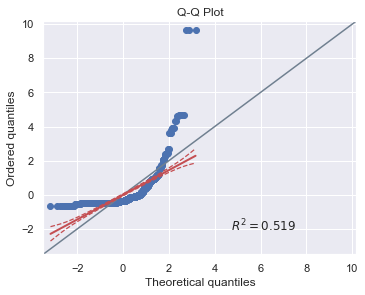

In [29]:
pg.qqplot(df['fare'], dist='norm')

Error: '<' not supported between instances of 'float' and 'str'
Error: '<' not supported between instances of 'str' and 'float'


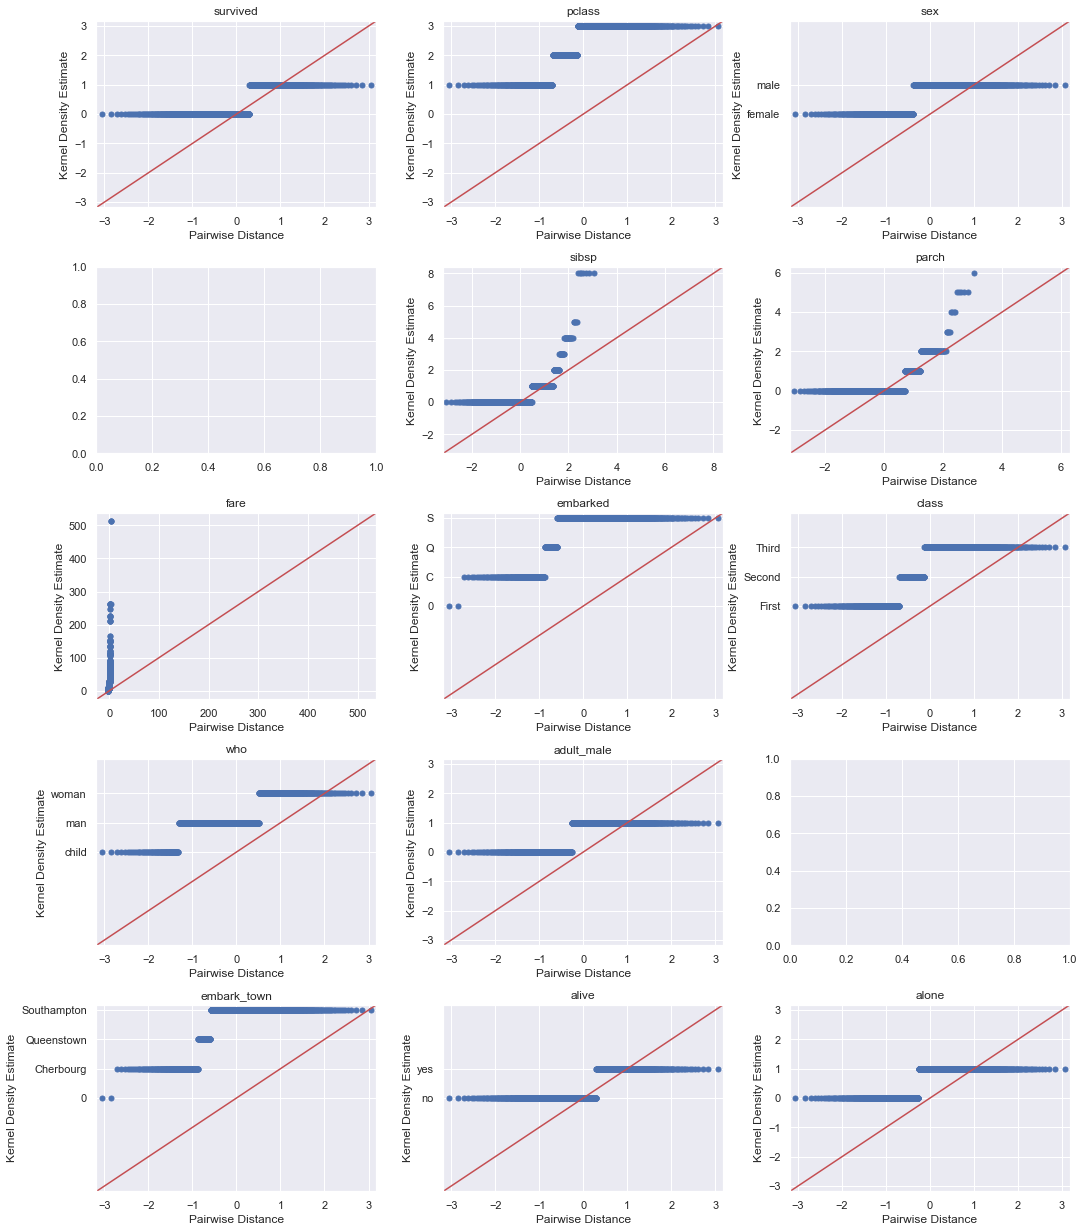

In [56]:
fig, axs = plt.subplots(figsize=(15, 20))
for n, col in enumerate(df.columns):
    try:
        plt.subplot(6,3,n+1)
        sm.qqplot(df[col], ax=plt.gca(), line='45',  marker='.', markerfacecolor='C0',
                  markeredgecolor='C0', markersize=10)
        #plt.axis('off')
        plt.title(col)
        plt.xlabel("Pairwise Distance");
        plt.ylabel("Kernel Density Estimate");
        plt.tight_layout()
        
    except TypeError as e:
        print("Error: " + str(e))
        
    except ValueError as e:
        print("Error: " + str(e))
plt.tight_layout(pad=5, w_pad=5, h_pad=5)    
plt.savefig('./Output/1000_QQ_plots13.png', bbox_inches='tight', pad_inches=0, dpi=200)

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

<AxesSubplot:xlabel='age', ylabel='Density'>

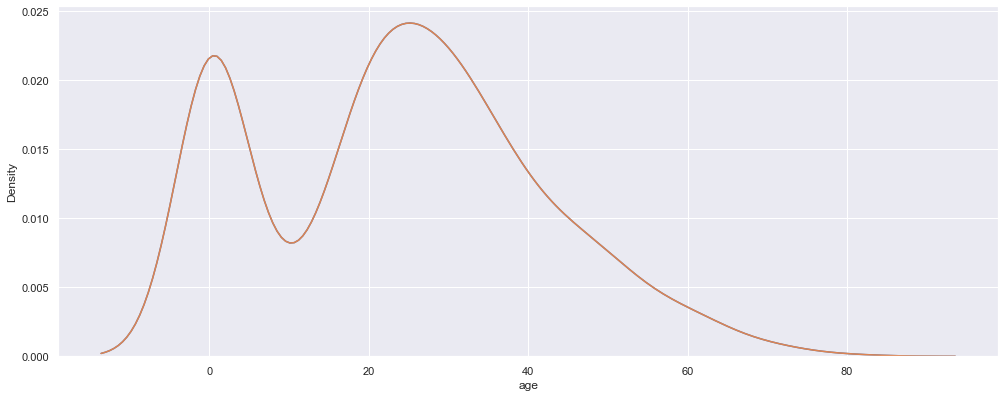

In [46]:
sns.distplot(df['age'],kde=True, hist=False)
sns.distplot(df['age'],kde=True, hist=False)

In [ ]:
%whos # display all defined variables

No variables match your requested type.
